In [76]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import mplhep as hep
from itertools import product
import warnings
import plot_utils
import fill_utils

# default parameters for the plots
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'figure.max_open_warning': 0})
matplotlib.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 60
plt.style.use(hep.style.CMS)
hep.style.use("CMS")

In [2]:
# parameters
output_label = '/home/submit/lavezzo/public_html/SUEP/analysis/closure_study/'
file_ext = '.png'

In [3]:
# create output dir
if not os.path.isdir(output_label): 
    print("Creating", output_label)
    os.mkdir(output_label)

# This part is meant to be flxeible, depending on what you want to import
# dimensions of plots: (sample) x (plot label)
# N.B.: lumis are applied through loader()

# input .pkl files
plotDir = '/work/submit/{}/SUEP/outputs/'.format(os.environ['USER'])
infile_names = glob.glob(plotDir+'*.pkl')

# generate list of files that you want to merge histograms for
offline_files_SUEP = [f for f in infile_names if "new_generic.pkl" in f and ('SUEP' in f)]
offline_files_2018 = [f for f in infile_names if "ISR_closure_v2.pkl" in f and ('20UL18' in f or 'Run2018' in f)]
offline_files_2017 = [f for f in infile_names if "ISR_closure_v2.pkl" in f and ('20UL17' in f or 'Run2017' in f)]
offline_files_2016 = [f for f in infile_names if "ISR_closure_v2.pkl" in f and ('20UL16' in f or 'Run2016' in f)]

# merge the histograms, apply lumis, exclude low HT bins
plots_SUEP_2018 = plot_utils.loader(offline_files_SUEP, year=2018, exclude_low_bins=True)
#plots_SUEP_2017 = loader(offline_files_SUEP, year=2017, exclude_low_bins=True)
#plots_SUEP_2016 = loader(offline_files_SUEP, year=2016, exclude_low_bins=True)
plots_2018 = plot_utils.loader(offline_files_2018, auto_lumi=True, exclude_low_bins=True)
plots_2017 = plot_utils.loader(offline_files_2017, auto_lumi=True, exclude_low_bins=True)
plots_2016 = plot_utils.loader(offline_files_2016, auto_lumi=True, exclude_low_bins=True)

# put everything in one dictionary, apply lumi for SUEPs
plots = {}
for key in plots_SUEP_2018.keys(): plots[key+"_2018"] = fill_utils.apply_normalization(plots_SUEP_2018[key], fill_utils.getXSection('generic_' + key + '_MD2_T2_HT', '2018', SUEP=True))
#for key in plots_SUEP_2017.keys(): plots[key+"_2017"] = fill_utils.apply_normalization(plots_SUEP_2017[key], fill_utils.getXSection(key + '+RunIIAutumn18-private+MINIAODSIM', '2018', SUEP=True))
#for key in plots_SUEP_2016.keys(): plots[key+"_2016"] = fill_utils.apply_normalization(plots_SUEP_2016[key], fill_utils.getXSection(key + '+RunIIAutumn18-private+MINIAODSIM', '2018', SUEP=True))
for key in plots_2018.keys(): plots[key+"_2018"] = plots_2018[key]
for key in plots_2017.keys(): plots[key+"_2017"] = plots_2017[key]
for key in plots_2016.keys(): plots[key+"_2016"] = plots_2016[key]

In [4]:
keys = list(plots.keys())
keys.sort()
for k in keys: print(k)

1000to1500_2016
1000to1500_2017
1000to1500_2018
1500to2000_2016
1500to2000_2017
1500to2000_2018
2000toInf_2016
2000toInf_2017
2000toInf_2018
200to300_2016
200to300_2017
200to300_2018
300to500_2016
300to500_2017
300to500_2018
500to700_2016
500to700_2017
500to700_2018
700to1000_2016
700to1000_2017
M1000_2018
M125_2018
M200_2018
M300_2018
M400_2018
M500_2018
M600_2018
M700_2018
M800_2018
M900_2018
QCD_HT_2016
QCD_HT_2017
QCD_HT_2018
data_2016
data_2017
data_2018


### 9 Region

Scaling factor alpha: 1.61947625702934
Sigma alpha: 0.0215090941027242


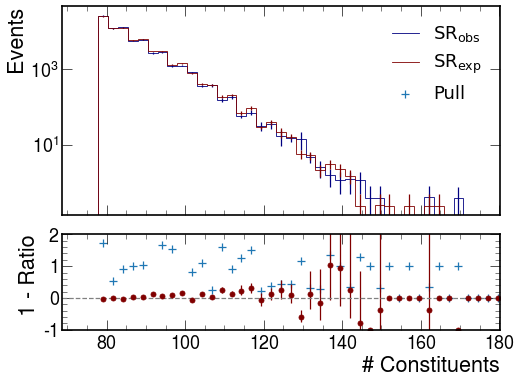

In [104]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster'
abcd = plots['QCD_HT_2018'][plot_label]

# 2D_SUEP_S1_vs_SUEP_nconst_Cluster
# 2D_ISR_S1_vs_ISR_nconst_ClusterInverted
# xregions = [0.35j, 0.4j, 0.5j, 1.0j]
# yregions = [10j, 40j, 80j, 300j]
xregions = [0.2j, 0.35j, 0.5j, 500j]
yregions = [15j, 47.5j, 80j, 500j]

# 2D_SUEP_S1_vs_SUEP_nconst_Cluster
# 2D_ISR_S1_vs_ISR_nconst_ClusterInverted
# xregions = [0.2j, 0.35j, 0.5j, 1.0j]
# yregions = [15j, 47.5j, 80j, 300j]

SR, SR_exp, alpha, sigma_alpha = plot_utils.ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x')

# edges = SR.axes[0].edges
# new_bins = [65, 70, 75, 100]
# SR = plot_utils.rebin_piecewise(SR, new_bins)
# SR_exp = plot_utils.rebin_piecewise(SR_exp, new_bins)

# pull test
diffs = np.abs(SR_exp.values() - SR.values())
tot_sigma = np.sqrt(SR.variances() + SR_exp.variances())
pull_ratios = np.where(tot_sigma > 0, diffs/tot_sigma, 0) + 1

print("Scaling factor alpha:", alpha)
print("Sigma alpha:", sigma_alpha)

fig, axs = plot_utils.plot_ratio([SR_exp, SR], labels=["$SR_{obs}$", "$SR_{exp}$"])
_ = axs[0].scatter([], [], marker='+', s=100, label='Pull')
_ = axs[1].scatter(SR.axes[0].centers, pull_ratios, marker='+', s=100, label='Pull')
_ = axs[1].set_ylim(0, 3)
_ = axs[0].legend(prop={"family":"DejaVu Sans"})
_ = axs[1].set_yticks(ticks=[0,1,2,3], labels=['-1','0','1', '2'])
_ = axs[1].set_ylabel("1 - Ratio")

### CR, SR Optimization - Contamination and Closure

In [94]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_ClusterInverted'

low_x = np.arange(0.0,0.35,0.05)*1.0j
high_x = np.arange(0.35,0.5,0.05)*1.0j
low_y = np.arange(0,45,5)*1.0j
#high_y = np.arange(45,85,5)*1.0j
high_y = np.array([80j])
# low_x = np.arange(0.1, 0.3, 0.05)*1.0j
# high_x = np.arange(0.4, 0.5, 0.05)*1.0j
# low_y = np.arange(5, 20, 5)*1.0j
# high_y = np.arange(55, 75, 5)*1.0j


def calc_err(h, xregions, yregions):
    SR, SR_exp, alpha, sigma_alpha = plot_utils.ABCD_9regions_errorProp(h, xregions, yregions, sum_var='x')
    diffs = np.abs(SR_exp.values() - SR.values())**2
    ratios = np.where(SR_exp.values() > 0, diffs/SR_exp.values(), 0)
    return np.sum(ratios)/SR.sum().value


def max_contamination(hSignal, hBkg, xregions, yregions):

    this_conts = []
    for ix in range(len(xregions)-1):
        for iy in range(len(yregions)-1):
            lbx = xregions[ix]
            hbx = xregions[ix+1]
            lby = yregions[iy]
            hby = yregions[iy+1]

            if ix == len(xregions)-2 and iy == len(yregions)-2: continue

            n1 = hSignal[lbx:hbx,lby:hby].sum().value
            n2 = hBkg[lbx:hbx,lby:hby].sum().value
            this_conts.append(n1/n2)
            
            if n1/n2 > 0.1: 
                print(n1/n2, lbx, hbx, lby, hby)
                print(n1,n2)

    return np.max(this_conts)

In [95]:
errs = []
conts = []
combs = product(low_x, high_x, low_y, high_y)
for (lx, hx, ly, hy) in combs:
    mx = (lx+hx)/2
    my = (ly+hy)/2

    xregions = [lx, mx, hx, 500j]
    yregions = [ly, my, hy, 500j]

    this_conts = []
    samples = [k for k in plots.keys() if k[0] == 'M']
    for sample in samples:
        cont = max_contamination(plots[sample][plot_label], plots['QCD_HT_2018'][plot_label], xregions, yregions)
        this_conts.append(cont)
    conts.append(max(this_conts))
        
    errs.append(calc_err(plots['QCD_HT_2018'][plot_label], xregions, yregions))

In [ ]:
combs = product(low_x.imag, high_x.imag, low_y.imag, high_y.imag)
combs_array = np.array([x for x in combs])
errs = np.array(errs)
conts = np.array(conts)

errs80 = errs[combs_array[:,3] == 80]
errs70 = errs[combs_array[:,3] == 70]
errs60 = errs[combs_array[:,3] == 60]
errs50 = errs[combs_array[:,3] == 50]
errs45 = errs[combs_array[:,3] == 45]

plt.hist(errs80, alpha=0.5, bins = np.linspace(0,0.3,100), label = 'SR 80')
plt.hist(errs70, alpha=0.5, bins = np.linspace(0,0.3,100), label = 'SR 70')
plt.hist(errs60, alpha=0.5, bins = np.linspace(0,0.3,100), label = 'SR 60')
plt.hist(errs50, alpha=0.5, bins = np.linspace(0,0.3,100), label = 'SR 50')
plt.hist(errs45, alpha=0.5, bins = np.linspace(0,0.3,100), label = 'SR 45')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.25j, 0.44999999999999996j, 15j, 80j)
(0j, 0.35j, 0j, 80j)


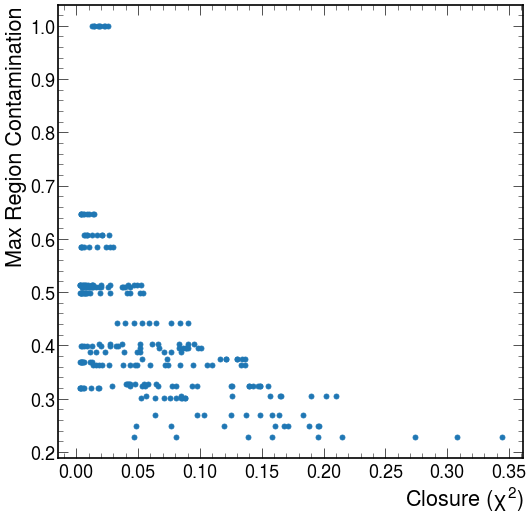

In [96]:
combs = product(low_x, high_x, low_y, high_y)
combs_list = [x for x in combs]
print(combs_list[np.argmin(errs)])
print(combs_list[np.argmin(conts)])



conts_norm = np.max(conts)

plt.scatter(errs, conts/conts_norm)
# plt.scatter(old_err, old_cont/conts_norm, label='Previous Regions')
# plt.scatter(opt_err, opt_cont/conts_norm, label='Optimized Regions')
plt.xlabel(r"Closure ($\chi^2$)")
plt.ylabel("Max Region Contamination")
plt.legend()
#plt.xlim(0,0.2)
#plt.ylim(0,3)

In [102]:
distances = np.sqrt(np.array(errs)**2 + (np.array(conts)/conts_norm)**2)
sorted_distances = np.argsort(distances)

for i in range(10):
    index = sorted_distances[i]
    print(combs_list[index])
    
best_regions = combs_list[sorted_distances[2]]
best_regions = combs_list[np.argmin(errs)]

lx = round(best_regions[0],3)
hx = round(best_regions[1],3)
ly = round(best_regions[2],3)
hy = round(best_regions[3],3)
mx = round((lx+hx)/2,3)
my = round((ly+hy)/2,3)

print("\nBest Regions:")
print("xregions = [{}, {}, {}, 500j]".format(lx, mx, hx))
print("yregions = [{}, {}, {}, 500j]".format(ly, my, hy))
opt_err = calc_err(plots['QCD_HT_2018'][plot_label],
                   [lx, mx, hx, 500j], [ly, my, hy, 500j])
opt_cont = max_contamination(plots['M125_2018'][plot_label], 
                             plots['QCD_HT_2018'][plot_label],
                             [lx, mx, hx, 500j], [ly, my, hy, 500j])
print("Optimal Error", round(opt_err,5))
print("Optimal Contamination", round(opt_cont,5))

(0j, 0.35j, 40j, 80j)
(0j, 0.35j, 35j, 80j)
(0.05j, 0.35j, 40j, 80j)
(0.05j, 0.35j, 35j, 80j)
(0j, 0.35j, 30j, 80j)
(0.05j, 0.35j, 30j, 80j)
(0j, 0.35j, 25j, 80j)
(0.1j, 0.35j, 40j, 80j)
(0.1j, 0.35j, 35j, 80j)
(0.1j, 0.35j, 0j, 80j)

Best Regions:
xregions = [0.25j, 0.35j, 0.45j, 500j]
yregions = [15j, 47.5j, 80j, 500j]
Optimal Error 0.00345
Optimal Contamination 0.00391


In [63]:
xregions = [0.05j, 0.2j, 0.35j, 500j]
yregions = [40j, 55j, 70j, 500j]
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_Cluster'

samples = [k for k in plots.keys() if k[0] == 'M']
for sample in samples:
    cont = max_contamination(plots[sample][plot_label], plots['QCD_HT_2018'][plot_label], xregions, yregions)
    print(sample, cont*100)

M125_2018 0.04116589034599849
M500_2018 0.006436523338955234
M600_2018 0.007468406043550116
M800_2018 0.005395463330027618
M200_2018 0.046960702548556166
M300_2018 0.017444188163223854
M900_2018 0.0020488436736533786
M400_2018 0.01142794163843499
M700_2018 0.003836184046801448
M1000_2018 0.000978136423660864


### Validation - ISR Closure

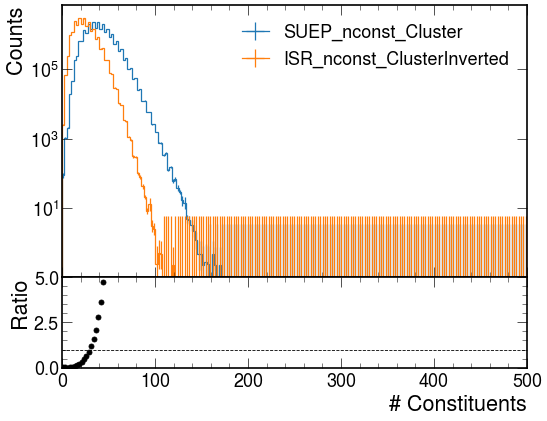

In [52]:
plot_label1 = "SUEP_nconst_Cluster"
plot_label2 = "ISR_nconst_ClusterInverted"
sample = 'QCD_HT_2018'
density = False

# QCD hist for ABCD region
h1 = plots[sample][plot_label1]
h2 = plots[sample][plot_label2]

if density:
    h1 = h1/h1.sum().value
    h2 = h2/h2.sum().value

fig = plt.figure(figsize=(10, 8))

_ = h1.plot_ratio(h2,
                 rp_num_label=plot_label1,
                 rp_denom_label=plot_label2)

fig.axes[0].set_yscale("log")
fig.axes[1].set_ylim(0,5)

plt.show()

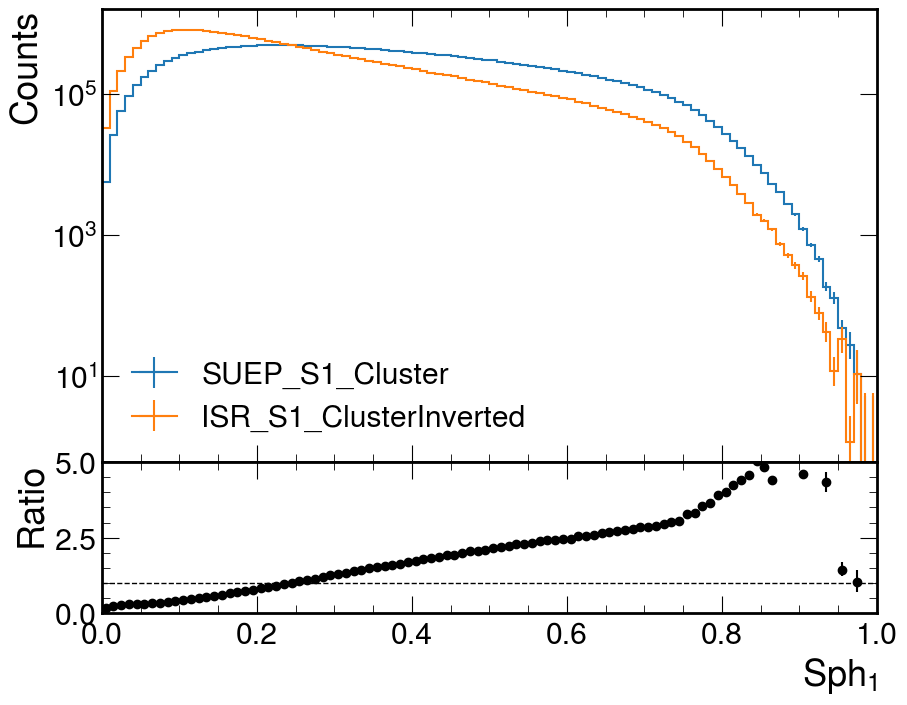

In [48]:
plot_label1 = "SUEP_S1_Cluster"
plot_label2 = "ISR_S1_ClusterInverted"
sample = 'QCD_HT_2018'
density = False

# QCD hist for ABCD region
h1 = plots[sample][plot_label1]
h2 = plots[sample][plot_label2]

if density:
    h1 = h1/h1.sum().value
    h2 = h2/h2.sum().value

fig = plt.figure(figsize=(10, 8))

_ = h1.plot_ratio(h2,
                 rp_num_label=plot_label1,
                 rp_denom_label=plot_label2)

fig.axes[0].set_yscale("log")
fig.axes[1].set_ylim(0,5)

plt.show()

0.007321330689489954
Scaling factor alpha: 2.09990898861859
Sigma alpha: 0.131787804728613


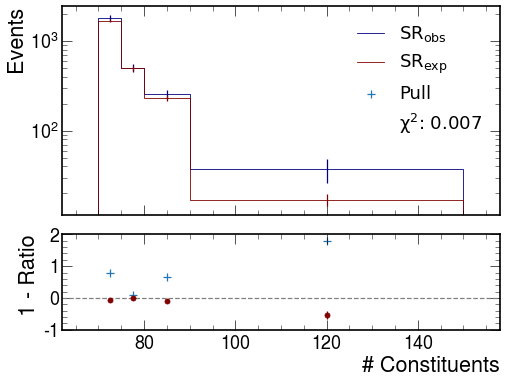

In [109]:
plot_label = '2D_ISR_S1_vs_ISR_nconst_ClusterInverted'
abcd = plots['QCD_HT_2018'][plot_label]
xregions = [0.3j, 0.4j, 0.5j, 500j]
yregions = [20j, 45j, 70j, 500j]
rebin = True
new_bins = [70,75,80,90,150]

SR, SR_exp, alpha, sigma_alpha = plot_utils.ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x')

if rebin:
    edges = SR.axes[0].edges
    SR = plot_utils.rebin_piecewise(SR, new_bins)
    SR_exp = plot_utils.rebin_piecewise(SR_exp, new_bins)

# pull test
diffs = np.abs(SR_exp.values() - SR.values())
tot_sigma = np.sqrt(SR.variances() + SR_exp.variances())
pull_ratios = np.where(tot_sigma > 0, diffs/tot_sigma, 0) + 1

# chi2 test
tot_sigma = np.sqrt(SR.variances()**2 + SR_exp.variances()**2)
chi2 = np.sum(np.where(tot_sigma > 0, (SR.values() - SR_exp.values())**2 / tot_sigma**2, 0)) / len(tot_sigma[tot_sigma > 0])
print(chi2)

print("Scaling factor alpha:", alpha)
print("Sigma alpha:", sigma_alpha)

fig, axs = plot_utils.plot_ratio([SR_exp, SR], labels=["$SR_{obs}$", "$SR_{exp}$"])
_ = axs[0].scatter([], [], marker='+', s=100, label='Pull')
_ = axs[1].scatter(SR.axes[0].centers, pull_ratios, marker='+', s=100, label='Pull')
_ = axs[0].plot([],[],' ',label=r'$\chi^2$: {}'.format(round(chi2,3)))
_ = axs[1].set_ylim(0, 3)
_ = axs[0].legend(prop={"family":"DejaVu Sans"})
_ = axs[1].set_yticks(ticks=[0,1,2,3], labels=['-1','0','1', '2'])
_ = axs[1].set_ylabel("1 - Ratio")